<a href="https://colab.research.google.com/github/syaify27/3d-map-visualization/blob/main/neural_network_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

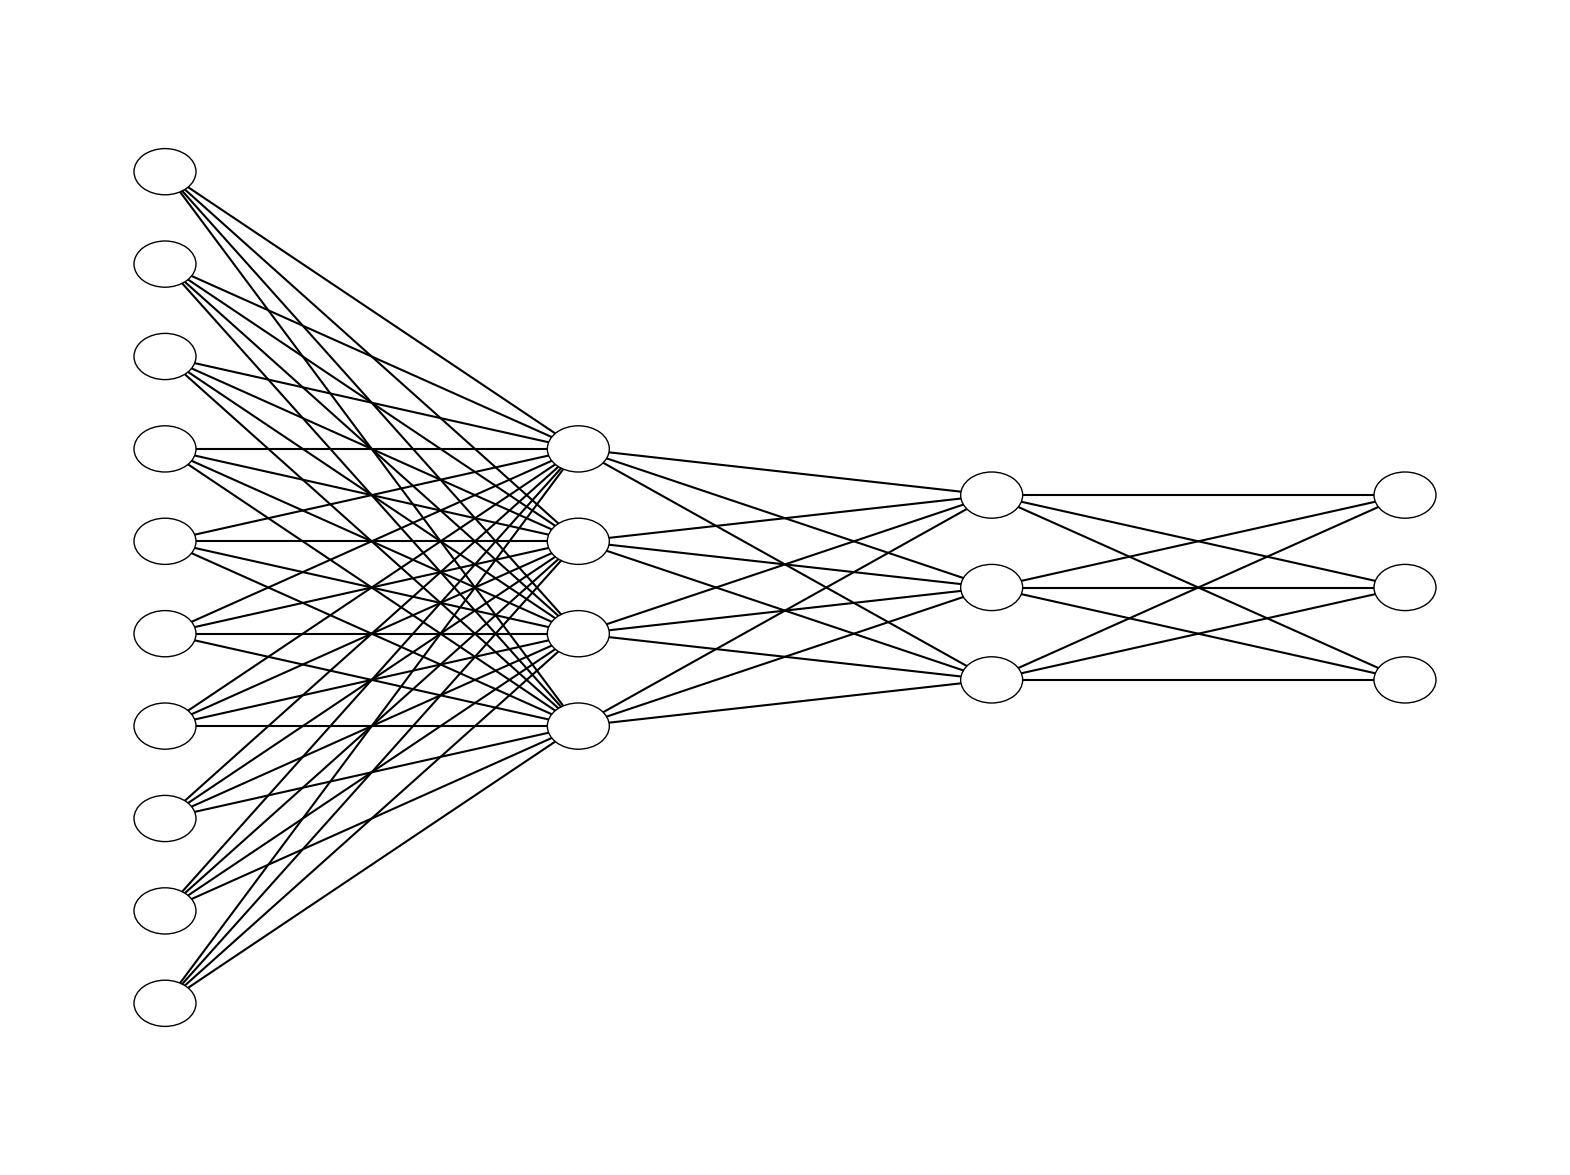

In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size):
            circle = plt.Circle((n * h_spacing + left, layer_top - m * v_spacing), v_spacing / 4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)

    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2. + (top + bottom) / 2.
        layer_top_b = v_spacing * (layer_size_b - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n * h_spacing + left, (n + 1) * h_spacing + left],
                                  [layer_top_a - m * v_spacing, layer_top_b - o * v_spacing], c='k')
                ax.add_artist(line)

fig = plt.figure(figsize=(20, 15))
ax = fig.gca()
ax.axis('off')

# Contoh layer: 3 neuron di input layer, 4 di hidden layer pertama, 3 di hidden layer kedua, dan 2 di output layer
draw_neural_net(ax, .1, .9, .1, .9, [10, 4, 3, 3])
plt.show()
